In [33]:
import numpy as np
import pandas as pd
from random import *
import random
import decimal
import matplotlib.pyplot as plt
import time
import math


# https://www.youtube.com/watch?v=QJoa0JYaX1I 16:20

In [15]:
df = pd.read_csv("xOR_problem.csv").loc[:,'0':'0.2']
X_train = df.loc[:,'0':'0.1']
Y_train = df.loc[:,'0.2']

   0  0.1  0.2
0  1    1    0
1  0    1    1
2  1    0    1
3  0    0    0
 


[0, 1, 1, 0]
[[1, 1], [0, 1], [1, 0], [0, 0]]


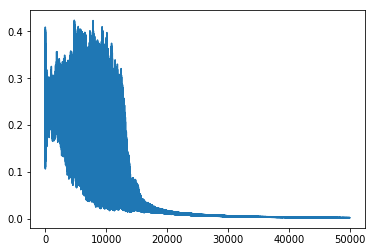

In [47]:
## Need to generalize it for n layers! it is generalized for n nodes in the 3 layers.
class nn:
    # input_nodes = 0
    # hidden_nodes = 0
    # output_nodes = 0
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes # The number of features!
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        self.weights_ih = np.random.randn(self.hidden_nodes,self.input_nodes )#2x2
        self.weights_ho = np.random.randn(self.output_nodes, self.hidden_nodes)#1x2
        self.bias_h = np.zeros([self.hidden_nodes, 1])#2x1
        self.bias_o = np.zeros([self.output_nodes, 1])#1x1
        self.learning_rate = 0.05

    def sigmoid(self,x):
        res = 1 / (1 + np.exp(-x))
        return res
    
    def feedforward(self, input_sample):
        # Generating the hidden outputs: input_sample: 1x2              
        input_sample_T = np.asmatrix(input_sample).T

        hidden = np.matrix(np.dot(self.weights_ih, input_sample_T))
        hidden = np.add(hidden,self.bias_h)
        sig = lambda t: self.sigmoid(t)
        hidden = sig(hidden)
        
        # Now, generate the output for the output layer:
        outputs = np.matrix(np.dot(self.weights_ho, hidden ))
        outputs = np.add(outputs,self.bias_o)
        sig = lambda t: self.sigmoid(t)
        outputs = sig(outputs)
        output_outputs = np.asmatrix(outputs)

        return hidden, output_outputs
    
    def train(self, input_sample, targets):
        targets = np.asmatrix(targets).T
        
        hidden, outputs =  self.feedforward(input_sample)
    
        # Calculate the errors from the output layer:
        # ERROR = Targets - ypred
        output_errors = (np.subtract(targets,outputs))
    
        # Calculate gradient
        # gradient = outputs*(1 - outputs)
        desig = lambda t: self.desigmoid(t)
        gradients = desig(np.asmatrix(outputs))
        gradients = np.multiply(gradients, output_errors)
        gradients = np.multiply(gradients, self.learning_rate)
        
        # Calculate deltas
        hidden_T = hidden.T
        weight_deltas_ho = np.dot(gradients, hidden_T)
        
        # Adjust the weights by the deltas
        self.weights_ho = np.add(self.weights_ho,weight_deltas_ho)
 
        # Adjust the bias by it's deltas:
        self.bias_o = np.add(self.bias_o,gradients)        
 
        # Calculate the error from the hidden node:
        hidden_errors = np.dot(self.weights_ho.T,output_errors)
        
        # Calculate the gradient for the hidden layer:
        hidden_gradient = desig(np.asmatrix(hidden))
        hidden_gradient = np.multiply(hidden_gradient, hidden_errors)
        hidden_gradient = np.multiply(hidden_gradient, self.learning_rate)
        
        # Calculate change of weight for input -> hidden (deltas):
        input_sample_T = np.matrix(input_sample).T
        weight_ih_deltas = np.dot(hidden_gradient, input_sample_T.T)
        
        # Update the input -> Hidden weights:
        self.weights_ih = np.add(self.weights_ih, weight_ih_deltas)
        
        # Adjust the bias by it's deltas:
        self.bias_h = np.add(self.bias_h,hidden_gradient)
        
        return output_errors
        
    def desigmoid(self, y):
        res = np.multiply(y,(1-y))
        return res
    def tanh(self,y ):
        return np.tanh(y)
    
    def inv_tanh(self,y):
        return (1 - (np.square(y)))

    
    def randomize_weight_matrix(self, rows, cols):
        rand_matrix = np.zeros((rows,cols))
        for i in range(rand_matrix.shape[0]):
            for j in range(rand_matrix.shape[1]):
                rand_matrix[i,j] = random.randint(-100, 101)/100
        return rand_matrix

# ********* Main ***********
# The number of nodes in the neural net:

n1 = nn(2,2,1)
matrix_x = [[]] * 4
list_y = []
j=0
for row in df.iterrows():
    index, data = row
    data = data.tolist()
    y_train = [data.pop(2)]
    x_train = data
    matrix_x[j] = x_train
    list_y.append(y_train[0])
    j+=1
errors =[]

def randomize_train(x,y,it):
    print("   % <-- Percent Completion:", end='\r')
    for i in range(it):
        print(math.floor(100*(i/it)), end="\r")
        rand = 1
        rand = randint(0, 3)
        err = (n1.train(x[rand], y[rand]))
        err = np.array(err)[0][0]
        errors.append(err**2)
                
    x_points = list(range(0, it))
    plt.plot(x_points,errors)
    plt.show()

        
randomize_train(matrix_x, list_y, 50000)

In [48]:
h, o = n1.feedforward([1,1])
print(o, "[0]")

h, o = n1.feedforward([0,0])
print(o, "[0]") 

h, o = n1.feedforward([0,1])
print(o, "[1]") 

h, o = n1.feedforward([1,0])
print(o, "[1]") 


[[0.05355266]] [0]
[[0.05568964]] [0]
[[0.95112685]] [1]
[[0.95091408]] [1]


In [ ]:
        
# Printing animation:
# b = "Loading" + "." * i
# print (b, end="\r")
# time.sleep(1)